#### Dataset

In [2]:
# Dataset: SMSSpamCollection
# https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the data

In [8]:
df = pd.read_csv('SMSSpamCollection', sep='\t',
                names = ['label','text'])

In [9]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5572, 2)

#### Preprocessing 

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [13]:
sent = 'Hello friends! Welcome to the world of Python Programming.'

In [14]:
tokens1 = word_tokenize(sent)

In [15]:
tokens1

['Hello',
 'friends',
 '!',
 'Welcome',
 'to',
 'the',
 'world',
 'of',
 'Python',
 'Programming',
 '.']

In [18]:
# remove the punctuations
tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]

In [19]:
tokens2

['hello',
 'friends',
 'welcome',
 'to',
 'the',
 'world',
 'of',
 'python',
 'programming']

In [20]:
swords = stopwords.words('english')

In [22]:
# remove the stopwords
tokens3 = [x.lower() for x in tokens2 if x not in swords]

In [23]:
tokens3

['hello', 'friends', 'welcome', 'world', 'python', 'programming']

In [24]:
# remove the stems
ls = LancasterStemmer()

In [25]:
tokens4 = [ls.stem(x) for x in tokens3]

In [26]:
tokens4

['hello', 'friend', 'welcom', 'world', 'python', 'program']

In [28]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x.lower() for x in tokens2 if x not in swords]
    tokens4 = [ls.stem(x) for x in tokens3]
    return tokens4

In [29]:
clean_text(sent)

['hello', 'friend', 'welcom', 'world', 'python', 'program']

In [31]:
sent = 'It was a difficult job for him too! But he did it'

In [32]:
clean_text(sent)

['difficult', 'job']

In [33]:
df['text'].apply(lambda x: clean_text(x))

0       [go, jurong, point, crazy, avail, bug, n, gre,...
1                              [ok, lar, jok, wif, u, on]
2       [fre, entry, 2, wkly, comp, win, fa, cup, fin,...
3             [u, dun, say, ear, hor, u, c, already, say]
4             [nah, think, goe, usf, liv, around, though]
                              ...                        
5567    [tim, tri, 2, contact, u, pound, priz, 2, clai...
5568                     [ü, b, going, esplanad, fr, hom]
5569                                [pity, mood, suggest]
5570    [guy, bitch, act, lik, interest, buy, someth, ...
5571                                     [rofl, tru, nam]
Name: text, Length: 5572, dtype: object

#### Separate the input and output data

In [38]:
x = df['text']
y = df['label']

In [39]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

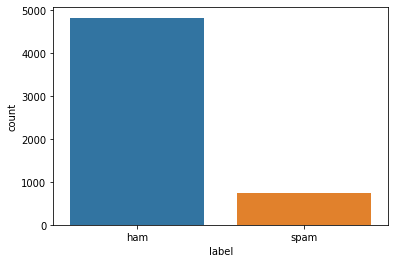

In [40]:
sns.countplot(x = y);

In [41]:
y.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### TF*IDF Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [42]:
x_vect = tfidf.fit_transform(x)

In [43]:
x_vect.shape

(5572, 5811)

In [44]:
x_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyad', 'é', 'ü'], dtype=object)

In [46]:
len(tfidf.get_feature_names_out())

5811

#### Cross-validation

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    x_vect, y, random_state=0)

In [50]:
x_train.shape

(4179, 5811)

In [51]:
x_test.shape

(1393, 5811)

In [52]:
y_train.value_counts()

ham     3617
spam     562
Name: label, dtype: int64

#### Build the classifier

In [54]:
# import the class
from sklearn.svm import SVC

In [88]:
# create the object
classifier = SVC(kernel='linear', random_state=0)

In [89]:
# Train the algorithm
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

#### Performance Evaluation

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [91]:
y_pred = classifier.predict(x_test)

In [92]:
y_pred

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [93]:
confusion_matrix(y_test, y_pred)

array([[1206,    2],
       [  22,  163]])

In [94]:
y_test.value_counts()

ham     1208
spam     185
Name: label, dtype: int64

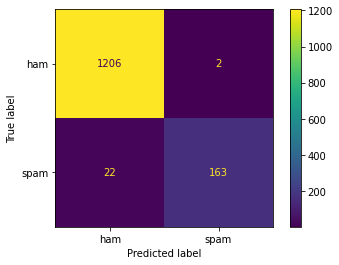

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [96]:
accuracy_score(y_test, y_pred)

0.9827709978463748

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



#### Predict on new messages received

In [99]:
# File: sample.csv
# Location: https://mitu.co.in/dataset

In [102]:
df = pd.read_csv('sample.csv', sep='\t',
                names = ['text'])

In [103]:
df

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [105]:
new = tfidf.transform(df['text'])

In [106]:
new.shape

(3, 5811)

In [107]:
classifier.predict(new)

array(['ham', 'spam', 'ham'], dtype=object)